In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset into python environment

In [2]:
data=pd.read_csv('titanic_dataset.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Make ‘PassengerId’ as the index column

In [4]:
data=pd.read_csv('titanic_dataset.csv',index_col='PassengerId')

In [5]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Check the basic details of the dataset

In [6]:
data.shape

(891, 11)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [8]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

# Fill in all the missing values present in all the columns in the dataset

In [9]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

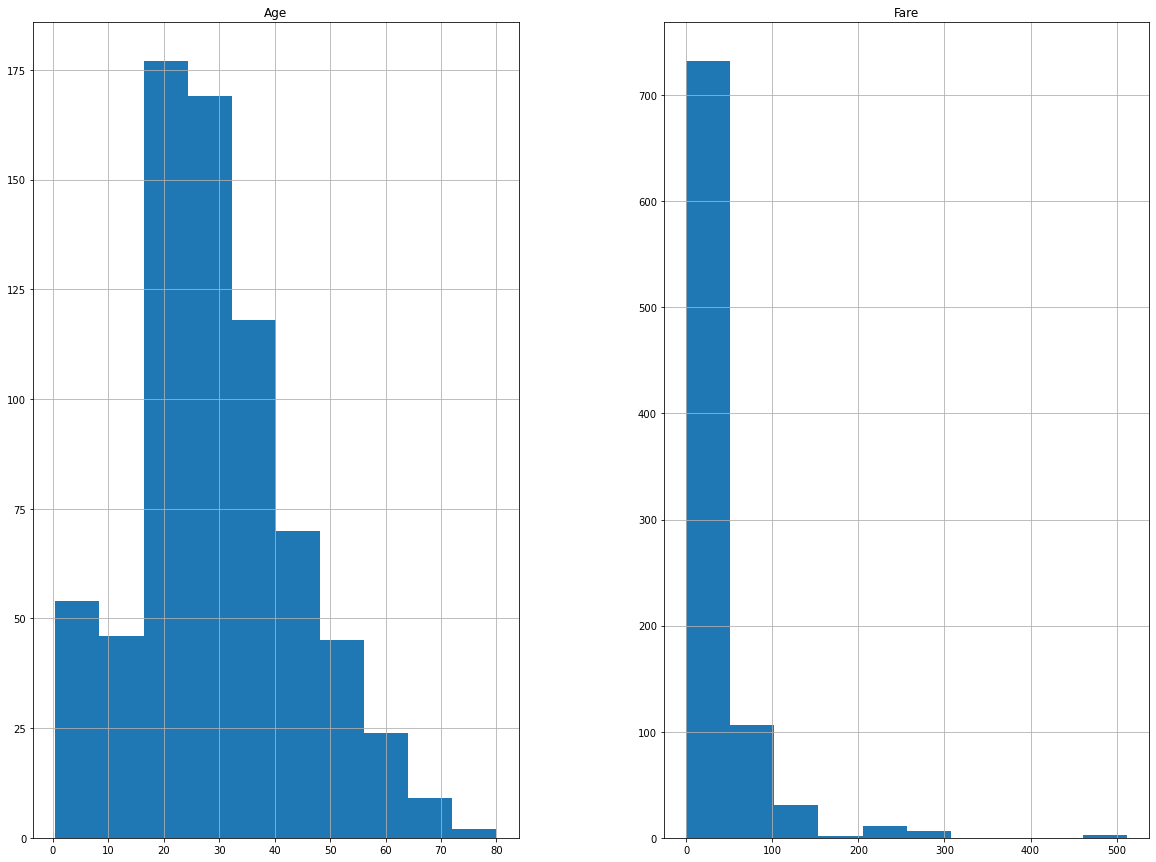

In [10]:
freqgraph=data.select_dtypes(include=['float','int'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [11]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
data['Age']=data['Age'].fillna(data['Age'].median())

In [13]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [14]:
data.Cabin.nunique()

147

In [15]:
data.Embarked.nunique()

3

In [16]:
Mode_Val1= data['Cabin'].mode()[0]
data['Cabin'].fillna(Mode_Val1,inplace=True)
Mode_Val2= data['Embarked'].mode()[0]
data['Embarked'].fillna(Mode_Val2,inplace=True)

In [17]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [18]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

# Check and handle outliers in at least 3 columns in the dataset

In [19]:
data.drop('Cabin',axis=1,inplace=True)

In [20]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

Text(0.5, 1.0, 'Box plot of Age')

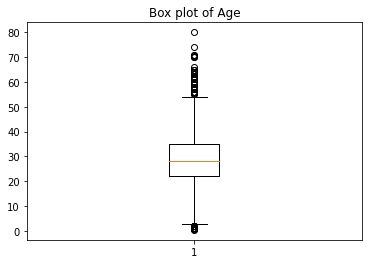

In [21]:
# Age
plt.boxplot(data['Age'])
plt.title('Box plot of Age')

In [22]:
# Outliers are present.
# # IQR = Q3-Q1

In [23]:
Q1=np.percentile(data['Age'],25,interpolation='midpoint')
Q2=np.percentile(data['Age'],50,interpolation='midpoint')
Q3=np.percentile(data['Age'],75,interpolation='midpoint')
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR

In [24]:
outlier=[]
for x in data['Age']:
    if((x>up_limit) or (x<low_limit)):
        outlier.append(x)

In [25]:
outlier

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [26]:
ind1=data['Age']>up_limit
data.loc[ind1].index

Int64Index([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],
           dtype='int64', name='PassengerId')

In [27]:
data.drop([53, 454, 461, 464, 557, 598, 600, 646, 699, 713, 737, 755, 772,
            797, 863],inplace=True)

Text(0.5, 1.0, 'Box plot of Age')

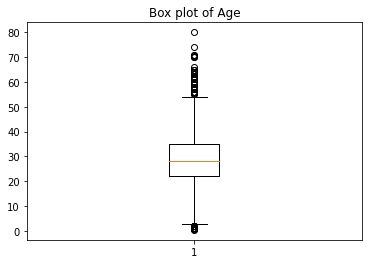

In [28]:
plt.boxplot(data['Age'])
plt.title('Box plot of Age')

Text(0.5, 1.0, 'Box plot of Fare')

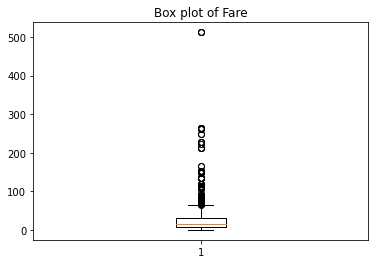

In [29]:
# Fare
plt.boxplot(data['Fare'])
plt.title('Box plot of Fare')

In [30]:
Q1=np.percentile(data['Fare'],25,interpolation='midpoint')
Q2=np.percentile(data['Fare'],50,interpolation='midpoint')
Q3=np.percentile(data['Fare'],75,interpolation='midpoint')
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR

In [31]:
outlier=[]
for x in data['Fare']:
    if((x>up_limit) or (x<low_limit)):
        outlier.append(x)

In [32]:
outlier

[71.2833,
 263.0,
 146.5208,
 82.1708,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 146.5208,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 65.0,
 77.9583,
 69.3,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 80.0,
 83.1583,
 69.55,
 89.1042,
 164.8667,
 69.55,

In [33]:
ind1=data['Fare']>up_limit
data.loc[ind1].index

Int64Index([  2,  28,  32,  35,  62,  63,  73,  89, 103, 119,
            ...
            793, 803, 821, 830, 836, 847, 850, 857, 864, 880],
           dtype='int64', name='PassengerId', length=113)

In [34]:
data.drop([2,  28,  32,  35,  62,  63,  73,  89,  93,  98, 103, 119, 121,
            140, 152, 160, 181, 202, 216, 219, 225, 231, 246, 257, 258, 259,
            270, 291, 292, 298, 306, 307, 308, 311, 312, 319, 320, 325, 326,
            333, 335, 337, 338, 342, 370, 374, 376, 378, 381, 386, 391, 394,
            413, 436, 446, 485, 487, 499, 505, 506, 521, 528, 538, 541, 551,
            558, 559, 582, 586, 610, 616, 628, 642, 656, 666, 680, 682, 690,
            701, 709, 717, 731, 738, 742, 743, 760, 764, 780, 790, 793, 803,
            836, 847, 850, 857, 864],inplace=True)

Text(0.5, 1.0, 'Box plot of Fare')

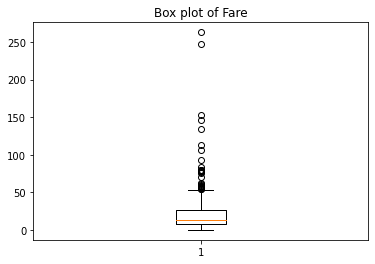

In [35]:
plt.boxplot(data['Fare'])
plt.title('Box plot of Fare')

Text(0.5, 1.0, 'Box plot of Parch')

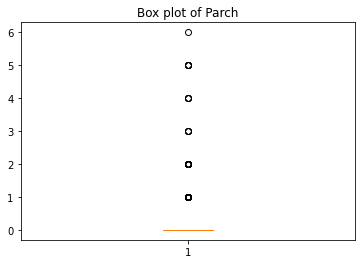

In [36]:
# Parch
plt.boxplot(data['Parch'])
plt.title('Box plot of Parch')

In [37]:
Q1=np.percentile(data['Parch'],25,interpolation='midpoint')
Q2=np.percentile(data['Parch'],50,interpolation='midpoint')
Q3=np.percentile(data['Parch'],75,interpolation='midpoint')
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR

In [38]:
outlier=[]
for x in data['Parch']:
    if((x>up_limit) or (x<low_limit)):
        outlier.append(x)

In [39]:
outlier

[1,
 2,
 1,
 5,
 1,
 1,
 5,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 3,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 4,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 3,
 4,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 4,
 1,
 1,
 2,
 1,
 1,
 2,
 5,
 1,
 1,
 1,
 2,
 1,
 5,
 2,
 1,
 1,
 1,
 2,
 1,
 6,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 5,
 2]

In [40]:
ind1=data['Parch']>up_limit
ind2 = data.loc[ind1].index

In [41]:
data.drop((ind2),inplace=True)

Text(0.5, 1.0, 'Box plot of Parch')

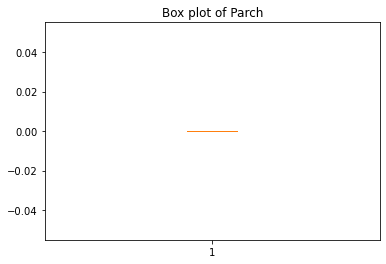

In [42]:
plt.boxplot(data['Parch'])
plt.title('Box plot of Parch')

# Do min max scaling on the feature set (Take ‘Survived’ as target)

In [43]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
...,...,...,...,...,...,...,...,...,...,...
885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,S
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S


In [44]:
# Drop unique values
data.drop('Name',axis=1,inplace=True)
data.drop('Ticket',axis=1,inplace=True)

In [45]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
6,0,3,male,28.0,0,0,8.4583,Q


In [46]:
# One hot Encoding
data=pd.get_dummies(data)

In [47]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,1,0,0,1
3,1,3,26.0,0,0,7.9250,1,0,0,0,1
4,1,1,35.0,1,0,53.1000,1,0,0,0,1
5,0,3,35.0,0,0,8.0500,0,1,0,0,1
6,0,3,28.0,0,0,8.4583,0,1,0,1,0


In [48]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,608.000000,608.000000,608.000000,608.000000,608.0,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000
mean,0.300987,2.457237,31.019737,0.205592,0.0,16.158900,0.251645,0.748355,0.144737,0.110197,0.745066
std,0.459065,0.762473,11.271384,0.472124,0.0,15.861867,0.434315,0.434315,0.352125,0.313393,0.436183
min,0.000000,1.000000,5.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,25.000000,0.000000,0.0,7.784375,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.0,9.108350,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,34.000000,0.000000,0.0,17.850000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,3.000000,0.0,146.520800,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
y=data['Survived']
X=data.drop('Survived',axis=1)

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=42, test_size=0.2)
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(X_train,y_train)
predictions=model.predict(X_test)

In [55]:
from sklearn.metrics import mean_squared_error
print('MSE is : ',mean_squared_error(y_test,predictions))
from sklearn.metrics import r2_score
print('R squared Value is : ', r2_score(y_test,predictions))

MSE is :  0.15423786279845048
R squared Value is :  0.308739430926788


In [58]:
from sklearn import preprocessing
min_max=preprocessing.MinMaxScaler(feature_range=(0,1))
X=min_max.fit_transform(X)
X=pd.DataFrame(X)
X.describe()

,0,1,2,3,4,5,6,7,8,9
count,608.000000,608.000000,608.000000,608.0,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000
mean,0.728618,0.346930,0.068531,0.0,0.110284,0.251645,0.748355,0.144737,0.110197,0.745066
std,0.381236,0.150285,0.157375,0.0,0.108257,0.434315,0.434315,0.352125,0.313393,0.436183
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.266667,0.000000,0.0,0.053128,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.306667,0.000000,0.0,0.062164,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,0.386667,0.000000,0.0,0.121826,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [60]:
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=42, test_size=0.2)
lr=linear_model.LinearRegression()
model=lr.fit(X_train,y_train)
predictions=model.predict(X_test)
print('MSE is : ',mean_squared_error(y_test,predictions))
print('R squared Value is : ', r2_score(y_test,predictions))

MSE is :  0.15423786279845048
R squared Value is :  0.308739430926788
